# Lecture 2: Introduction to Jupyter Notebook

## First, get Jupyter notebook up and running.

If you've made it here, you've done this step!  

## Second, familiarize yourself with python.  
As a first pass, you may want to play around with the examples in the cells below.  Hit Shift+Enter to evaluate a cell.

In [17]:
print("Hello World CMPE 255 - DATA Mining @ Shreek!")  # Hello world is really easy in python!

Hello World CMPE 255 - DATA Mining @ Shreek!


In [2]:
A = [6,4,3,8,5] # A is a list.  
print(A) # you can print it out!

[6, 4, 3, 8, 5]


In [3]:
A[0] # lists are zero-indexed. 

6

In [20]:
# slicing up lists:
A = [6,4,3,8,5]
print(A[2:4]) # this is the list [A[2],A[3]] (it doesn't include A[4])
print(A[2:])  # this notation starts with A[2] and goes to the end
print(A[:4])  # this starts at the beginning and goes up until A[3]
print(A[:])   # this just returns a copy of the whole list

[3, 8]
[3, 8, 5]
[6, 4, 3, 8]
[6, 4, 3, 8, 5]


In [21]:
len(A) # get the length of a list

5

In [22]:
A.append(7) # this appends "7" to A
print(A)
# what happens if you evaluate this cell multiple times?

[6, 4, 3, 8, 5, 7]


In [23]:
A = A[:5] # let's set A back to how it was.
print(A)

[6, 4, 3, 8, 5]


In [24]:
A = A + ["cat"]  # Python is totally cool with this
print(A)

[6, 4, 3, 8, 5, 'cat']


In [25]:
A = [6,4,3,8,5]
for x in A:  # we can iterate over items in a list to get a for loop
    print(2*x)

12
8
6
16
10


In [26]:
# Notice that there's no {} or ; or anything like that.  
#Python uses the whitespace to tell what's in the loop and what's not.

for x in A:
    print(3*x)
print("This is outside the loop")

print("---")

for x in A:
    print(3*x)
    print("This is inside the loop")

18
12
9
24
15
This is outside the loop
---
18
This is inside the loop
12
This is inside the loop
9
This is inside the loop
24
This is inside the loop
15
This is inside the loop


In [27]:
T = range(5)  # the range function gives you a way to iterate over a range of integers
for x in T:
    print(x)

0
1
2
3
4


In [28]:
for i in range(5):  # we can also use the range function to iterate over A
    print(2*A[i])

12
8
6
16
10


In [29]:
for i in range(len(A)):  # and if we don't know how long A is to begin with, we can just use len(A)
    print(2*A[i])

12
8
6
16
10


In [30]:
B = [] # make an empty list
for x in A:
    B.append(2*x)  
print(B)

[12, 8, 6, 16, 10]


In [31]:
C = [ 2*x for x in A ] 
# This makes exactly the same list B that we had before, but in just one line.
print(C)


[12, 8, 6, 16, 10]


In [32]:
def f(x,y):  # this is how we define a function.  Notice that x and y don't have types.
    return x + y

print(f(2,3))  # python has one version of + for integers
print(f([1,2,3],[4,5,6]))  # and another version for lists
print(f("hello ", "world"))  # and another version for strings
# what happens if you do f(2, "cat")?

5
[1, 2, 3, 4, 5, 6]
hello world


### As a more serious pass, here is a nice tutorial: https://www.programiz.com/python-programming



## Third, let's explore some data



In [34]:
!pip install matplotlib


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.8 MB 12.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.8 MB 19.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.8 MB 12.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 12.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 12.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 8.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 8.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 8.6 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# The usual preamble
import pandas as pd
# Open graphs in new cells in the page rather than in a separate window
%matplotlib inline 
# Make the graphs a bit prettier, and bigger
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [39]:
import pandas as pd


In [40]:
complaints = pd.read_csv('311-requests.csv', low_memory=False)


# 1.1 What's even in it? (the summary)

When you look at a large dataframe, instead of showing you the contents of the dataframe, it'll show you a *summary*. This includes all the columns, and how many non-null values there are in each column.

In [41]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,26524469,10/21/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,11235,2940 OCEAN AVENUE,OCEAN AVEN

# 1.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [42]:
complaints['Complaint Type']

0        Noise - Street/Sidewalk
1                Illegal Parking
2             Noise - Commercial
3                Noise - Vehicle
4                         Rodent
                  ...           
49994            PAINT - PLASTER
49995                   ELECTRIC
49996            PAINT - PLASTER
49997       GENERAL CONSTRUCTION
49998                   NONCONST
Name: Complaint Type, Length: 49999, dtype: object

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [43]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [44]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [45]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 1.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [46]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
49994,PAINT - PLASTER,BROOKLYN
49995,ELECTRIC,BRONX
49996,PAINT - PLASTER,QUEENS
49997,GENERAL CONSTRUCTION,BRONX


That showed us a summary, and then we can look at the first 10 rows:

In [47]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 1.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [48]:
complaints['Complaint Type'].value_counts()

Complaint Type
HEATING                       11512
Street Light Condition         2995
GENERAL CONSTRUCTION           2947
PLUMBING                       2148
DOF Literature Request         2093
                              ...  
Poison Ivy                        1
Tunnel Condition                  1
Drinking Water                    1
Municipal Parking Facility        1
Trans Fat                         1
Name: count, Length: 158, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

In [49]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Complaint Type
HEATING                     11512
Street Light Condition       2995
GENERAL CONSTRUCTION         2947
PLUMBING                     2148
DOF Literature Request       2093
PAINT - PLASTER              2031
Blocked Driveway             1804
NONCONST                     1462
Traffic Signal Condition     1426
Illegal Parking              1354
Name: count, dtype: int64

But it gets better! We can plot them!

<Axes: xlabel='Complaint Type'>

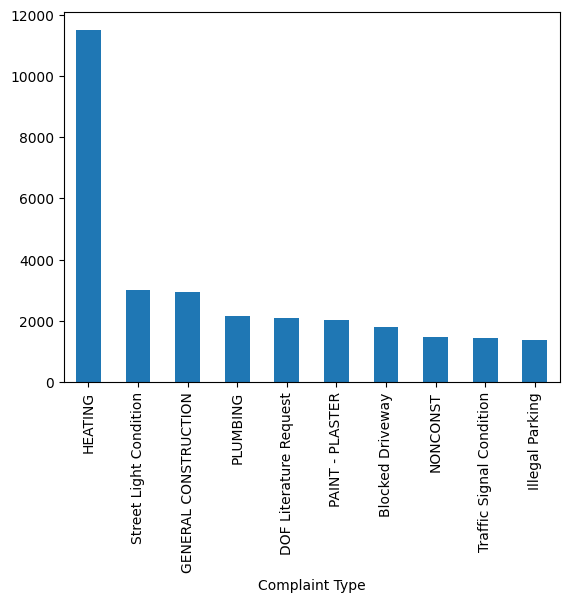

In [50]:
complaint_counts[:10].plot(kind='bar')